Epoch 100/1500, Loss: 0.4819
Epoch 200/1500, Loss: 0.4194
Epoch 300/1500, Loss: 0.3902
Epoch 400/1500, Loss: 0.3732
Epoch 500/1500, Loss: 0.3621
Epoch 600/1500, Loss: 0.3542
Epoch 700/1500, Loss: 0.3484
Epoch 800/1500, Loss: 0.3439
Epoch 900/1500, Loss: 0.3403
Epoch 1000/1500, Loss: 0.3375
Epoch 1100/1500, Loss: 0.3352
Epoch 1200/1500, Loss: 0.3333
Epoch 1300/1500, Loss: 0.3318
Epoch 1400/1500, Loss: 0.3305
Epoch 1500/1500, Loss: 0.3294
Custom Model Train Accuracy: 0.857
Custom Model Test Accuracy: 0.850
Sklearn Train Accuracy: 0.850
Sklearn Test Accuracy: 0.850


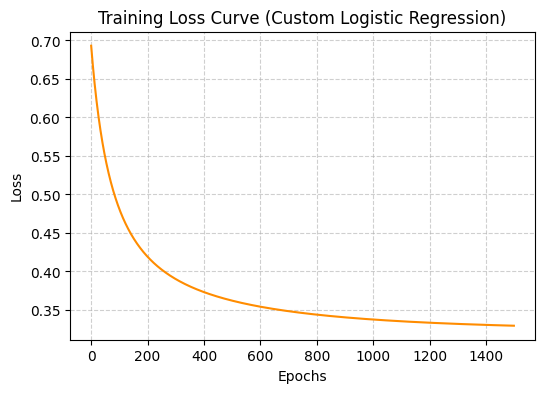

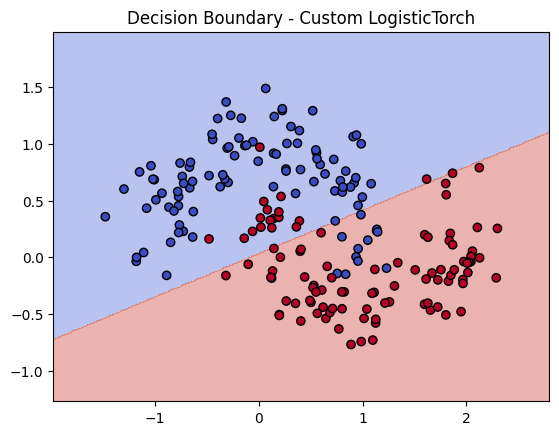

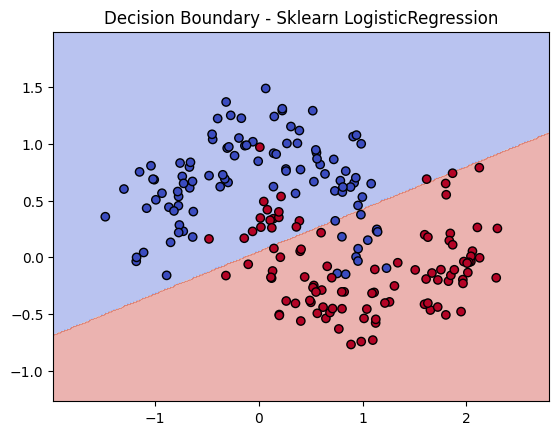

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ---------------------------------------------------------------
# Custom Logistic Regression using PyTorch
# ---------------------------------------------------------------
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.criterion = nn.BCELoss()  # same as your friend's version

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        n_features = X.shape[1]
        self.weights = torch.zeros((n_features, 1), requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)

        optimizer = optim.SGD([self.weights, self.bias], lr=self.lr)

        for epoch in range(self.epochs):
            logits = torch.matmul(X, self.weights) + self.bias
            predictions = torch.sigmoid(logits)

            loss = self.criterion(predictions, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            self.loss_history.append(loss.item())

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss.item():.4f}")

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            logits = torch.matmul(X, self.weights) + self.bias
            probs = torch.sigmoid(logits)
        return probs.numpy()

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


# ---------------------------------------------------------------
# Dataset: make_moons
# ---------------------------------------------------------------
np.random.seed(42)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_custom = LogisticTorch(lr=0.05, epochs=1500)
model_custom.fit(X_train, y_train)

train_preds = model_custom.predict(X_train)
test_preds = model_custom.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Custom Model Train Accuracy: {train_acc:.3f}")
print(f"Custom Model Test Accuracy: {test_acc:.3f}")

# ---------------------------------------------------------------
# Compare with sklearn LogisticRegression
# ---------------------------------------------------------------
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)

print(f"Sklearn Train Accuracy: {accuracy_score(y_train, sk_model.predict(X_train)):.3f}")
print(f"Sklearn Test Accuracy: {accuracy_score(y_test, sk_model.predict(X_test)):.3f}")

# ---------------------------------------------------------------
# Plot loss curve
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(model_custom.loss_history, color='darkorange')
plt.title('Training Loss Curve (Custom Logistic Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ---------------------------------------------------------------
# Decision boundaries
# ---------------------------------------------------------------
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

plot_boundary(model_custom, X, y, 'Decision Boundary - Custom LogisticTorch')

class Wrapper:
    def __init__(self, sk_model):
        self.sk_model = sk_model
    def predict(self, X):
        return self.sk_model.predict(X)

plot_boundary(Wrapper(sk_model), X, y, 'Decision Boundary - Sklearn LogisticRegression')
